In [1]:
# This package is for doing symbolic math in python
from sympy import *

### Create symbolic variables
Using unicode symbols for math is quite nice

In [2]:
θ, α, θ̇, α̇, θ̈, α̈ = symbols('θ α θ̇ α̇  θ̈ α̈')
rm, kt, km, mr, Lr, Jr, Dr, mp, Lp, Jp, Dp, g, τ = symbols('rm kt km mr Lr Jr Dr mp Lp Jp Dp g τ')


In [3]:
init_printing(use_unicode=True) # Allows for latex-like equations

In [4]:
# Make sure symbols match what they are supposed to match
print('θ={}, α={}, θ̇={}, α̇={}, θ̈={}, α̈={}'.format(θ, α, θ̇, α̇, θ̈, α̈))
print('rm={}, kt={}, km={}, mr={}, Lr={}, Jr={}, Dr={}, mp={}, Lp={}, Jp={}, Dp={}, g={}, τ={}'.format(rm, kt, km, mr, Lr, Jr, Dr, mp, Lp, Jp, Dp, g, τ))


θ=θ, α=α, θ̇=θ̇, α̇=α̇, θ̈=θ̈, α̈=α̈
rm=rm, kt=kt, km=km, mr=mr, Lr=Lr, Jr=Jr, Dr=Dr, mp=mp, Lp=Lp, Jp=Jp, Dp=Dp, g=g, τ=τ


In [39]:
# Copied from the derive-simulator notebook
# θ̈ = (-Lp*Lr*mp*(-8*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2*α) + 4*Lp*g*mp*sin(α))*cos(α) + (4*Jp + Lp**2*mp)*(4*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2*α) + 2*Lp*Lr*mp*α̇**2*sin(α) - 4*τ))/(4*Lp**2*Lr**2*mp**2*cos(α)**2 - (4*Jp + Lp**2*mp)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp))
# α̈ = (2*Lp*Lr*mp*(4*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2*α) + 2*Lp*Lr*mp*α̇**2*sin(α) - 4*τ)*cos(α) - 0.5*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp)*(-8*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2*α) + 4*Lp*g*mp*sin(α)))/(4*Lp**2*Lr**2*mp**2*cos(α)**2 - (4*Jp + Lp**2*mp)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp))
α̈ = (2*Lp*Lr*mp*(4*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2*α) + 2*Lp*Lr*mp*α̇**2*sin(α) - 4*τ)*cos(α) - 0.5*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp)*(-8*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2*α) + 4*Lp*g*mp*sin(α)))/(4*Lp**2*Lr**2*mp**2*cos(α)**2 - (4*Jp + Lp**2*mp)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp))
θ̈ = (-Lp*Lr*mp*(-8*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2*α) + 4*Lp*g*mp*sin(α))*cos(α) + (4*Jp + Lp**2*mp)*(4*Dr*θ̇ + Lp**2*mp*α̇*θ̇*sin(2*α) + 2*Lp*Lr*mp*α̇**2*sin(α) - 4*τ))/(4*Lp**2*Lr**2*mp**2*cos(α)**2 - (4*Jp + Lp**2*mp)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp))



### Derive the energy of the system

In [40]:
Ep = (1/2) * mp * g * Lp * (1 - cos(α))
Ek = (1/2) * Jp * α̇**2


## From the derive simulator workbook

We break each of these into their component parts (i.e. k1*θ̇, k2*θ̇*α̇, etc...). This doesn't include the angle because that would be fucking impossible...
Once we get everything into component parts (need to do some simplification on paper), check to make sure they are correct.

![](./pics/derived_eq_order.png)

So here for $\ddot \alpha$ it would be:

$$\ddot\alpha = \frac{1}{z(\alpha)} \Big[
    a \dot\theta cos(\alpha)
    + b\dot\theta \dot\alpha sin(2\alpha) cos(\alpha) 
    + c \dot\alpha^2 sin(\alpha) cos(\alpha)
    + u \tau cos(\alpha)
%     
    + [g\dot\alpha + h \dot\theta^2 sin(2\alpha) + i sin(\alpha)](d+f)
    + [sin^2(\alpha) g \dot\alpha + h sin^2(\alpha) \dot\theta^2 sin(2\alpha)+ i sin^3(\alpha)](e)
\Big]$$

Where z is that overly complicated thing at the bottom

In [41]:
z = (4*Lp**2*Lr**2*mp**2*cos(α)**2 - (4*Jp + Lp**2*mp)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp))
a = 2*Lp*Lr*mp*(4*Dr)
b = 2*Lp*Lr*mp*(Lp**2*mp)
c = 2*Lp*Lr*mp*(2*Lp*Lr*mp)
u = 2*Lp*Lr*mp*(-4)
d = - (1/2)*(4*Jr)
e = - (1/2)*(Lp**2*mp)
f = - (1/2)*(4*Lr**2*mp)
g = (-8*Dp)
h = (Lp**2*mp)
i = (4*Lp*g*mp)
# z, a, b, c, u, d, e, f, g, h, i = symbols('z, a, b, c, u, d, e, f, g, h, i')


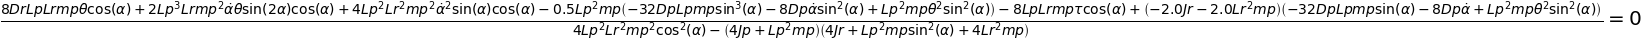

In [42]:
# Should be equal to the original
α̈_2 = (1/z) * (
    a*θ̇*cos(α) + 
    b*α̇*θ̇*sin(2*α)*cos(α) + 
    c*α̇**2*sin(α)*cos(α) + 
    u*τ*cos(α) +
    (d+f) * (g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)) + 
    e * (sin(α)**2*g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)**3)
)
α̈_num = (
    a*θ̇*cos(α) + 
    b*α̇*θ̇*sin(2*α)*cos(α) + 
    c*α̇**2*sin(α)*cos(α) + 
    u*τ*cos(α) +
    (d+f) * (g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)) + 
    e * (sin(α)**2*g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)**3)
)
Eq(α̈_2)

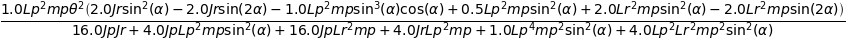

In [44]:
simplify(α̈_2 - α̈)

In [52]:
# - (1/2)*(4*Jr + Lp**2*mp*sin(α)**2 + 4*Lr**2*mp)*(-8*Dp*α̇ + Lp**2*mp*θ̇**2*sin(2*α) + 4*Lp*g*mp*sin(α))

simplify((
    - (1/2)*(4*Jr)*(-8*Dp*α̇)
    - (1/2)*(4*Jr)*(Lp**2*mp*θ̇**2*sin(2*α))
    - (1/2)*(4*Jr)*(4*Lp*g*mp*sin(α))
    - (1/2)*(Lp**2*mp*sin(α)**2)*(-8*Dp*α̇)
    - (1/2)*(Lp**2*mp*sin(α)**2)*(Lp**2*mp*θ̇**2*sin(2*α))
    - (1/2)*(Lp**2*mp*sin(α)**2)*(4*Lp*g*mp*sin(α))
    - (1/2)*(4*Lr**2*mp)*(-8*Dp*α̇)
    - (1/2)*(4*Lr**2*mp)*(Lp**2*mp*θ̇**2*sin(2*α))
    - (1/2)*(4*Lr**2*mp)*(4*Lp*g*mp*sin(α))
        ) - (
#         a*θ̇*cos(α)
#         b*α̇*θ̇*sin(2*α)*cos(α)
#         c*α̇**2*sin(α)*cos(α)
#         u*τ*cos(α)
        (d+f) * (g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)) +
        e * (sin(α)**2*g*α̇ + h*θ̇**2*sin(α)**2 + i*sin(α)**3)
    )
)